In [1]:
# 导入所需要的包
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# 读取数据
df = pd.read_csv("D:/flight_weather_data_V9_5_5.csv", index_col=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,index,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,...,WetBulbTempCategory_DEST,WindSpeedCategory_ORIGIN,WindSpeedCategory_DEST,SnowDepthCategory_ORIGIN,SnowDepthCategory_DEST,SnowfallCategory_ORIGIN,SnowfallCategory_DEST,PrecipitationCategory_ORIGIN,PrecipitationCategory_DEST,Y
0,0,0,9581,2018,1,1,1,DL,5391,EV,...,0,1,1,0,3,0,0,0,0,235
1,1,1,30573,2018,1,2,2,DL,5391,EV,...,0,0,1,0,3,0,0,0,0,138
2,2,2,31526,2018,1,2,2,DL,960,DL,...,0,0,0,0,3,0,0,0,0,160
3,3,3,49391,2018,1,3,3,DL,1794,DL,...,0,0,0,0,0,0,0,0,0,115
4,4,4,51877,2018,1,3,3,DL,5541,EV,...,0,0,0,0,0,0,0,0,0,139


In [3]:
# 各变量的缺失值数量
df.isnull().sum()

Unnamed: 0.1                    0
Unnamed: 0                      0
index                           0
YEAR                            0
MONTH                           0
                               ..
SnowfallCategory_ORIGIN         0
SnowfallCategory_DEST           0
PrecipitationCategory_ORIGIN    0
PrecipitationCategory_DEST      0
Y                               0
Length: 90, dtype: int64

In [4]:
import pandas as pd

# 按航空公司分组，计算取消率
airline_cancellation = df.groupby('MKT_CARRIER')['CANCELLED'].mean().reset_index()
airline_cancellation.columns = ['Airline', 'Cancellation Rate']
print(airline_cancellation)


   Airline  Cancellation Rate
0       AA           0.018372
1       AS           0.026340
2       B6           0.020012
3       DL           0.011659
4       F9           0.016267
5       G4           0.022132
6       HA           0.010739
7       NK           0.016074
8       UA           0.024245
9       VX           0.017577
10      WN           0.024692


In [5]:
# 按出发机场分组，计算取消率
departure_airport_cancellation = df.groupby('ORIGIN')['CANCELLED'].mean().reset_index()
departure_airport_cancellation.columns = ['Departure Airport', 'Cancellation Rate']

# 按到达机场分组，计算取消率
arrival_airport_cancellation = df.groupby('DEST')['CANCELLED'].mean().reset_index()
arrival_airport_cancellation.columns = ['Arrival Airport', 'Cancellation Rate']

print(departure_airport_cancellation)
print(arrival_airport_cancellation)

    Departure Airport  Cancellation Rate
0                 ABE           0.021434
1                 ABI           0.012934
2                 ABQ           0.015804
3                 ABR           0.037885
4                 ABY           0.004127
..                ...                ...
375               XWA           0.060834
376               YAK           0.089087
377               YKM           0.040541
378               YNG           0.000000
379               YUM           0.017456

[380 rows x 2 columns]
    Arrival Airport  Cancellation Rate
0               ABE           0.020333
1               ABI           0.012081
2               ABQ           0.014176
3               ABR           0.032371
4               ABY           0.004082
..              ...                ...
375             XWA           0.052279
376             YAK           0.045191
377             YKM           0.042523
378             YNG           0.000000
379             YUM           0.014423

[380 rows x 2 c

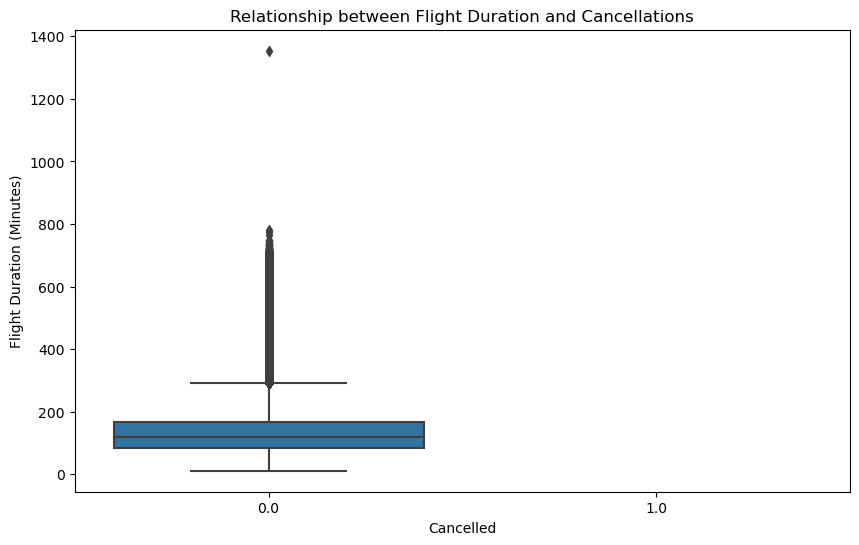

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制航班时长和取消情况的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='CANCELLED', y='ACTUAL_ELAPSED_TIME', data=df)
plt.title('Relationship between Flight Duration and Cancellations')
plt.xlabel('Cancelled')
plt.ylabel('Flight Duration (Minutes)')
plt.show()


In [7]:
# 创建新的列，表示一天中的时间段
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['Hour'] = df['CRS_DEP_TIME'] // 100  # 提取小时
df['Time of Day'] = df['Hour'].apply(time_of_day)

# 按时间段分组，计算取消率
time_of_day_cancellation = df.groupby('Time of Day')['CANCELLED'].mean().reset_index()
print(time_of_day_cancellation)


  Time of Day  CANCELLED
0   Afternoon   0.017952
1     Evening   0.021873
2     Morning   0.018995


In [8]:
# 按周几分组，计算取消率
day_of_week_cancellation = df.groupby('DAY_OF_WEEK')['CANCELLED'].mean().reset_index()
day_of_week_cancellation.columns = ['Day of Week', 'Cancellation Rate']
print(day_of_week_cancellation)


   Day of Week  Cancellation Rate
0            1           0.021831
1            2           0.018127
2            3           0.018028
3            4           0.019829
4            5           0.019889
5            6           0.018872
6            7           0.019656


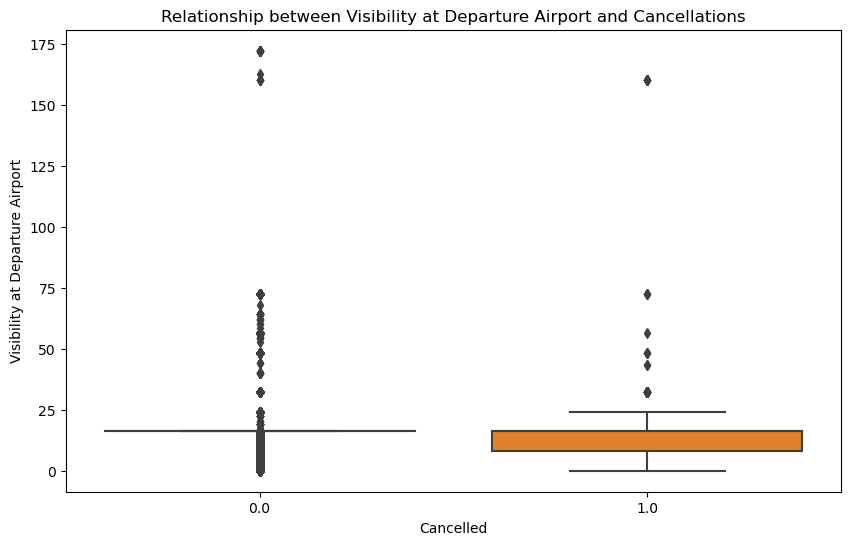

In [9]:
# 绘制能见度和取消情况的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='CANCELLED', y='HourlyVisibility_ORIGIN', data=df)
plt.title('Relationship between Visibility at Departure Airport and Cancellations')
plt.xlabel('Cancelled')
plt.ylabel('Visibility at Departure Airport')
plt.show()


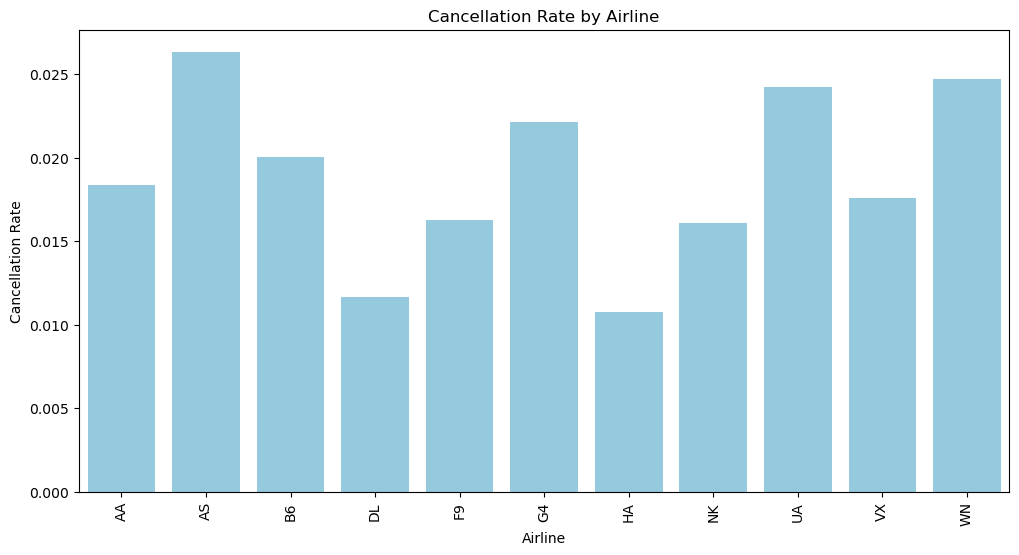

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average cancellation rate per airline
airline_cancellation = df.groupby('MKT_CARRIER')['CANCELLED'].mean().reset_index()
airline_cancellation.columns = ['Airline', 'Cancellation Rate']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=airline_cancellation, x='Airline', y='Cancellation Rate', color='skyblue')
plt.xticks(rotation=90)
plt.title('Cancellation Rate by Airline')
plt.ylabel('Cancellation Rate')
plt.xlabel('Airline')
plt.show()


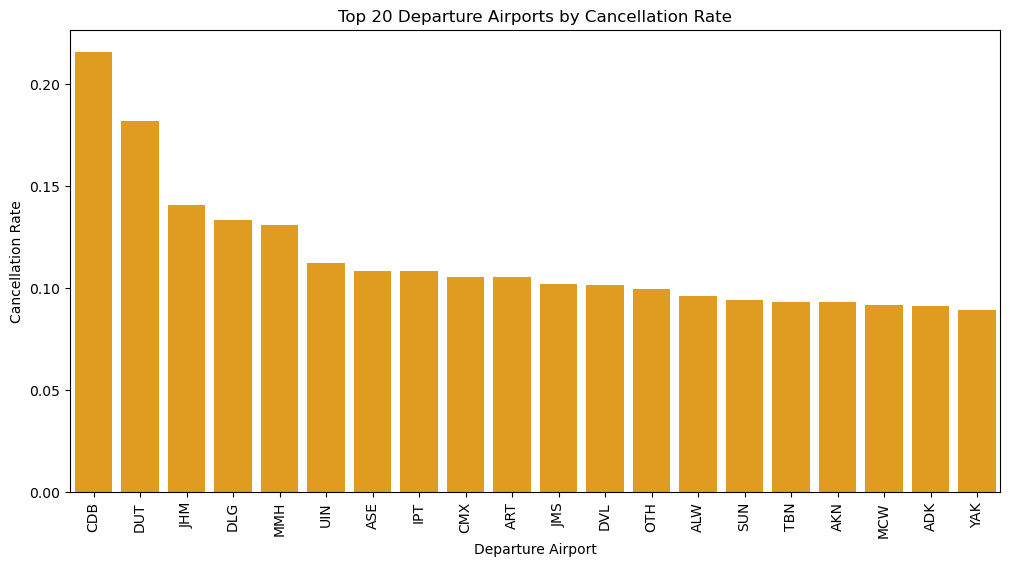

In [11]:
# Departure airport cancellation rate
origin_cancellation = df.groupby('ORIGIN')['CANCELLED'].mean().reset_index()
origin_cancellation.columns = ['Departure Airport', 'Cancellation Rate']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=origin_cancellation.sort_values(by='Cancellation Rate', ascending=False).head(20), 
            x='Departure Airport', y='Cancellation Rate', color='orange')
plt.xticks(rotation=90)
plt.title('Top 20 Departure Airports by Cancellation Rate')
plt.ylabel('Cancellation Rate')
plt.xlabel('Departure Airport')
plt.show()


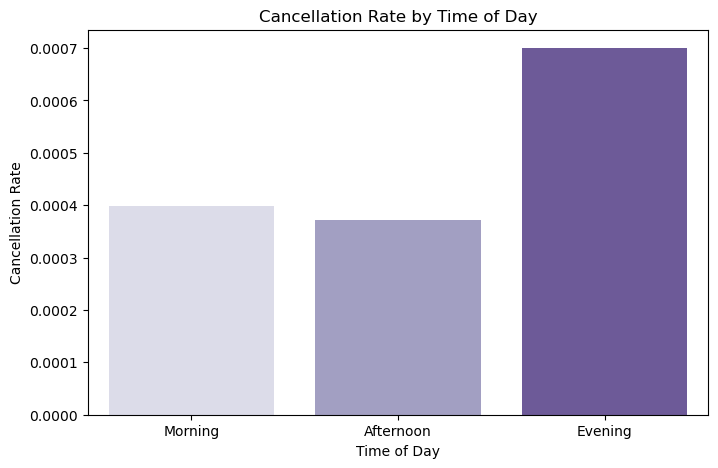

In [12]:
# Create categories for Time of Day
df['Time of Day'] = pd.cut(df['DEP_TIME'], bins=[0, 1200, 1800, 2359], labels=['Morning', 'Afternoon', 'Evening'])

# Calculate cancellation rate per time of day
time_of_day_cancellation = df.groupby('Time of Day')['CANCELLED'].mean().reset_index()
time_of_day_cancellation.columns = ['Time of Day', 'Cancellation Rate']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=time_of_day_cancellation, x='Time of Day', y='Cancellation Rate', palette='Purples')
plt.title('Cancellation Rate by Time of Day')
plt.ylabel('Cancellation Rate')
plt.xlabel('Time of Day')
plt.show()


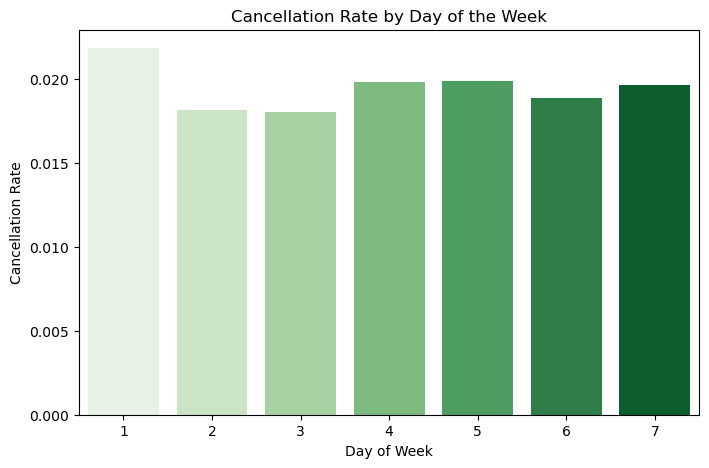

In [13]:
# Calculate cancellation rate by day of the week
day_of_week_cancellation = df.groupby('DAY_OF_WEEK')['CANCELLED'].mean().reset_index()
day_of_week_cancellation.columns = ['Day of Week', 'Cancellation Rate']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=day_of_week_cancellation, x='Day of Week', y='Cancellation Rate', palette='Greens')
plt.title('Cancellation Rate by Day of the Week')
plt.ylabel('Cancellation Rate')
plt.xlabel('Day of Week')
plt.show()


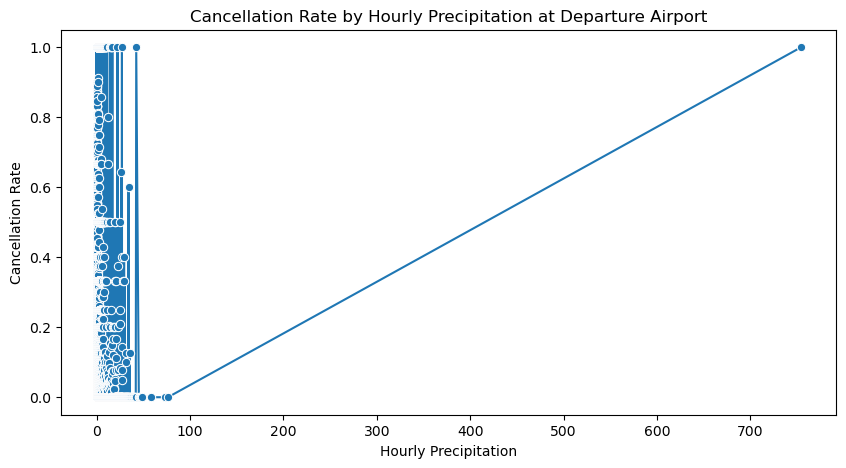

In [14]:
# Analyze impact of precipitation on cancellations at the departure airport
weather_cancellation = df.groupby('HourlyPrecipitation_ORIGIN')['CANCELLED'].mean().reset_index()
weather_cancellation.columns = ['HourlyPrecipitation_ORIGIN', 'Cancellation Rate']

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=weather_cancellation, x='HourlyPrecipitation_ORIGIN', y='Cancellation Rate', marker='o')
plt.title('Cancellation Rate by Hourly Precipitation at Departure Airport')
plt.ylabel('Cancellation Rate')
plt.xlabel('Hourly Precipitation')
plt.show()


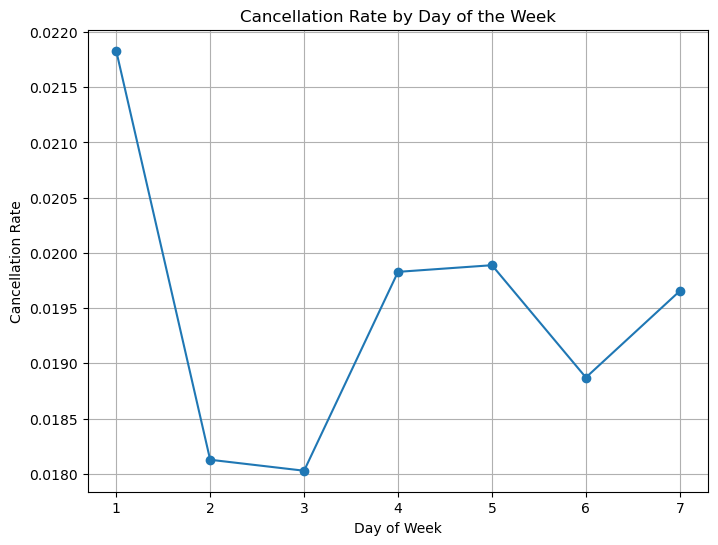

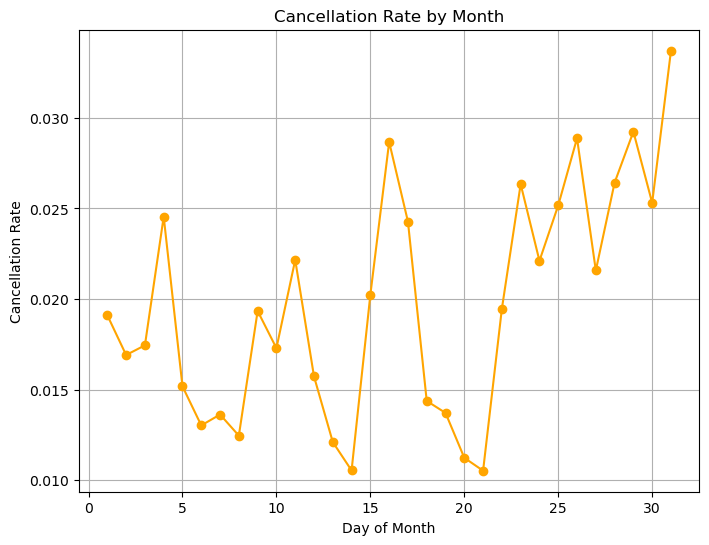

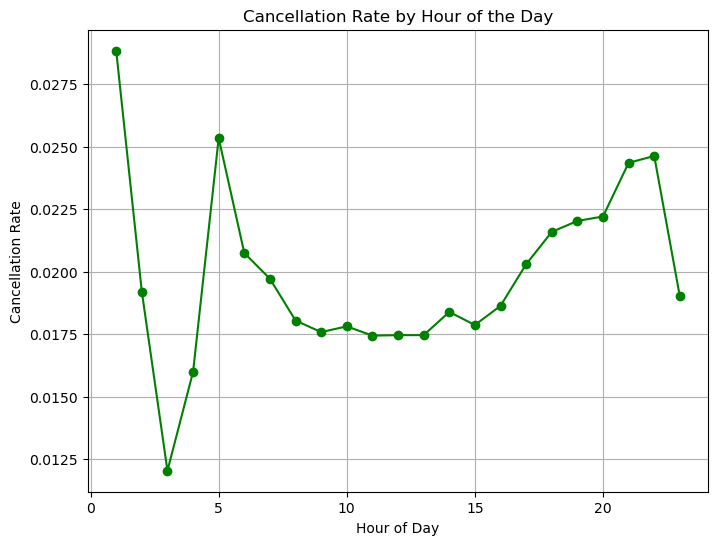

In [15]:
import pandas as pd

# Load your dataset (assuming it's in a DataFrame named `df`)
# df = pd.read_csv('your_data.csv')  # Load data if necessary

# Ensure CANCELLED column is binary (1 for canceled, 0 for not)
df['CANCELLED'] = df['CANCELLED'].astype(int)

# Convert `CRS_DEP_TIME` to datetime and extract hour
df['CRS_DEP_HOUR'] = pd.to_datetime(df['CRS_DEP_TIME'], format='%H%M', errors='coerce').dt.hour

### Daily Pattern Analysis ###
# Group by `DAY_OF_WEEK` and calculate cancellation rate
daily_cancellations = df.groupby('DAY_OF_WEEK')['CANCELLED'].mean().reset_index()
daily_cancellations.columns = ['Day of Week', 'Cancellation Rate']

### Monthly Pattern Analysis ###
# Group by `MONTH` and calculate cancellation rate
monthly_cancellations = df.groupby('DAY_OF_MONTH')['CANCELLED'].mean().reset_index()
monthly_cancellations.columns = ['Day of Month', 'Cancellation Rate']

### Hourly Pattern Analysis ###
# Group by `CRS_DEP_HOUR` and calculate cancellation rate
hourly_cancellations = df.groupby('CRS_DEP_HOUR')['CANCELLED'].mean().reset_index()
hourly_cancellations.columns = ['Hour of Day', 'Cancellation Rate']

### Visualization (optional) ###
import matplotlib.pyplot as plt

# Daily Pattern Plot
plt.figure(figsize=(8, 6))
plt.plot(daily_cancellations['Day of Week'], daily_cancellations['Cancellation Rate'], marker='o')
plt.xlabel('Day of Week')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Day of the Week')
plt.grid()
plt.show()

# Monthly Pattern Plot
plt.figure(figsize=(8, 6))
plt.plot(monthly_cancellations['Day of Month'], monthly_cancellations['Cancellation Rate'], marker='o', color='orange')
plt.xlabel('Day of Month')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Month')
plt.grid()
plt.show()

# Hourly Pattern Plot
plt.figure(figsize=(8, 6))
plt.plot(hourly_cancellations['Hour of Day'], hourly_cancellations['Cancellation Rate'], marker='o', color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Hour of the Day')
plt.grid()
plt.show()


# Monthly Cancellation Rates for Top 10 Airports by Average Cancellation Rate

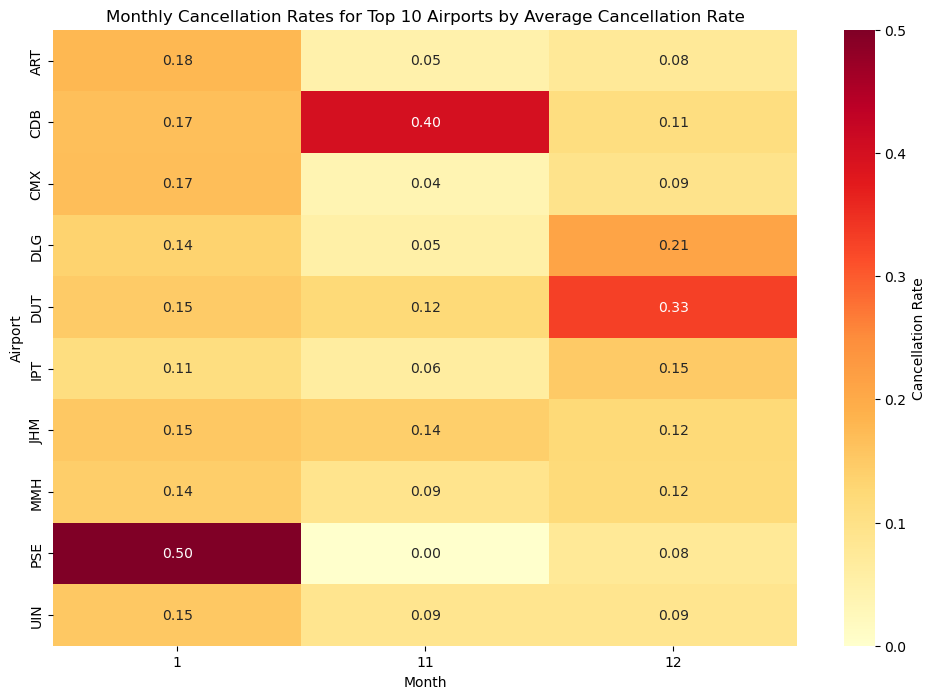

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设数据已经加载在 DataFrame `df` 中
# 1. 计算每个机场在每个月的取消率
airport_monthly_cancellation = df.groupby(['ORIGIN', 'MONTH'])['CANCELLED'].mean().reset_index()
airport_monthly_cancellation.columns = ['Airport', 'Month', 'Cancellation Rate']

# 2. 计算每个机场的平均取消率，找到排名前十的机场
top_airports = airport_monthly_cancellation.groupby('Airport')['Cancellation Rate'].mean().nlargest(10).index

# 3. 筛选出前十机场的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Airport'].isin(top_airports)]

# 4. 将数据转为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Airport", columns="Month", values="Cancellation Rate")

# 5. 可视化 - 使用热力图展示取消率排名前十的机场在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Cancellation Rate'})
plt.title("Monthly Cancellation Rates for Top 10 Airports by Average Cancellation Rate")
plt.xlabel("Month")
plt.ylabel("Airport")
plt.show()


# Monthly Cancellation Rates for Lowest 10 Airports by Average Cancellation Rate

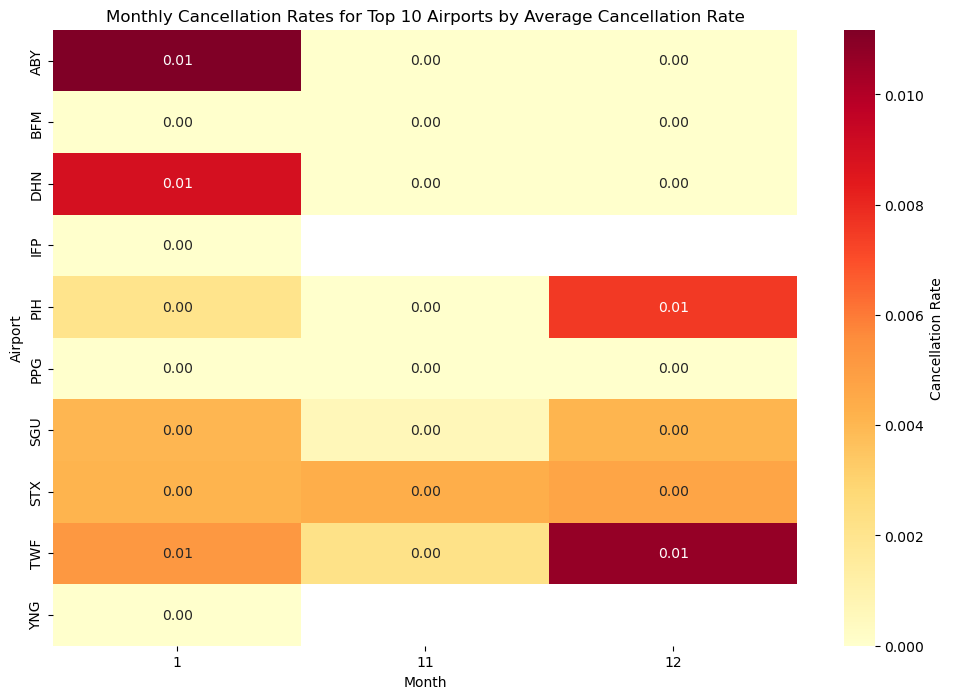

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设数据已经加载在 DataFrame `df` 中
# 1. 计算每个机场在每个月的取消率
airport_monthly_cancellation = df.groupby(['ORIGIN', 'MONTH'])['CANCELLED'].mean().reset_index()
airport_monthly_cancellation.columns = ['Airport', 'Month', 'Cancellation Rate']

# 2. 计算每个机场的平均取消率，找到排名前十的机场
top_airports = airport_monthly_cancellation.groupby('Airport')['Cancellation Rate'].mean().nsmallest(10).index

# 3. 筛选出前十机场的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Airport'].isin(top_airports)]

# 4. 将数据转为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Airport", columns="Month", values="Cancellation Rate")

# 5. 可视化 - 使用热力图展示取消率排名前十的机场在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Cancellation Rate'})
plt.title("Monthly Cancellation Rates for Lowest 10 Airports by Average Cancellation Rate")
plt.xlabel("Month")
plt.ylabel("Airport")
plt.show()

# Monthly Cancellation Rates for ALL Market Airlines by Average Cancellation Rate

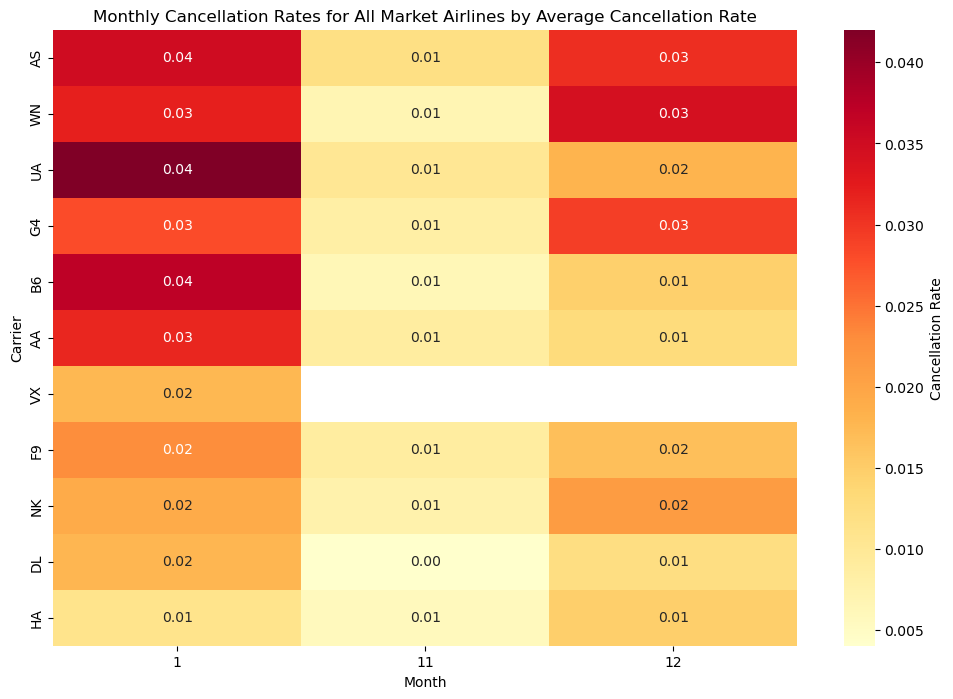

In [41]:
# 1. 计算每个航司在每个月的取消率
airport_monthly_cancellation = df.groupby(['MKT_CARRIER', 'MONTH'])['CANCELLED'].mean().reset_index()
airport_monthly_cancellation.columns = ['Carrier', 'Month', 'Cancellation Rate']

# 2. 计算每个航司的平均取消率，按平均取消率排序
carrier_avg_cancellation = airport_monthly_cancellation.groupby('Carrier')['Cancellation Rate'].mean().sort_values(ascending=False)

# 3. 获取取消率排名前十的航司
top_carriers = carrier_avg_cancellation.index

# 4. 筛选出前十航司的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Carrier'].isin(top_carriers)]

# 5. 将数据转换为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Carrier", columns="Month", values="Cancellation Rate")

# 6. 重新按照平均取消率从高到低排序
pivot_table_top = pivot_table_top.loc[carrier_avg_cancellation.index]

# 7. 可视化 - 使用热力图展示所有航司在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Cancellation Rate'})
plt.title("Monthly Cancellation Rates for All Market Airlines by Average Cancellation Rate")
plt.xlabel("Month")
plt.ylabel("Carrier")
plt.show()

# Monthly Average Delay for Top 10 Airports by Average Delay

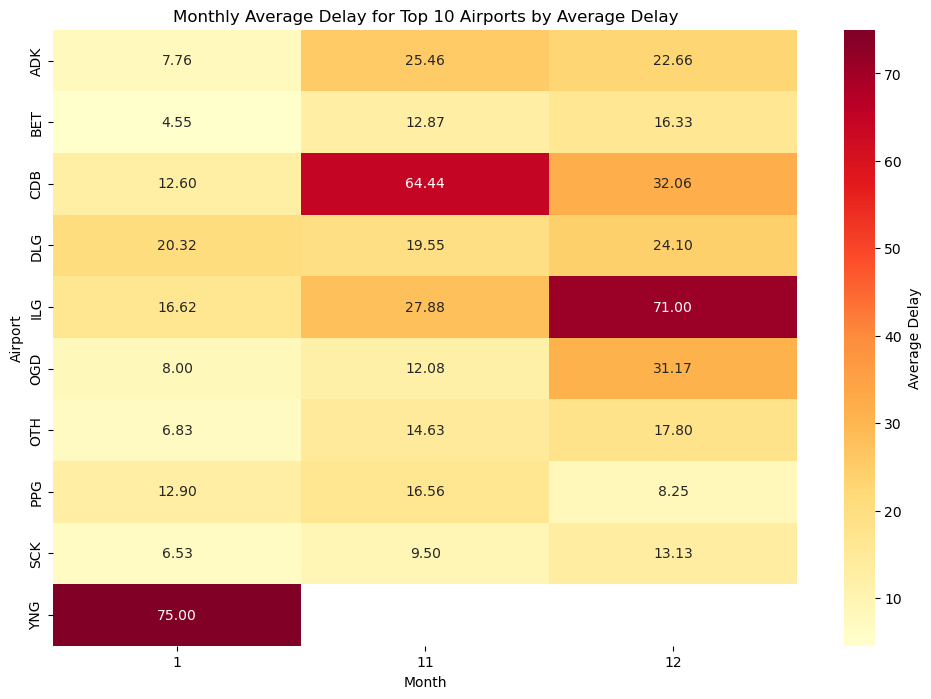

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设数据已经加载在 DataFrame `df` 中
# 1. 计算每个机场在每个月的取消率
airport_monthly_cancellation = df.groupby(['ORIGIN', 'MONTH'])['ARR_DELAY'].mean().reset_index()
airport_monthly_cancellation.columns = ['Airport', 'Month', 'Average Delay']

# 2. 计算每个机场的平均取消率，找到排名前十的机场
top_airports = airport_monthly_cancellation.groupby('Airport')[ 'Average Delay'].mean().nlargest(10).index

# 3. 筛选出前十机场的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Airport'].isin(top_airports)]

# 4. 将数据转为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Airport", columns="Month", values= 'Average Delay')

# 5. 可视化 - 使用热力图展示取消率排名前十的机场在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label':  'Average Delay'})
plt.title("Monthly Average Delay for Top 10 Airports by Average Delay")
plt.xlabel("Month")
plt.ylabel("Airport")
plt.show()

# Monthly Average Delay for Lowest 10 Airports by Average Delay

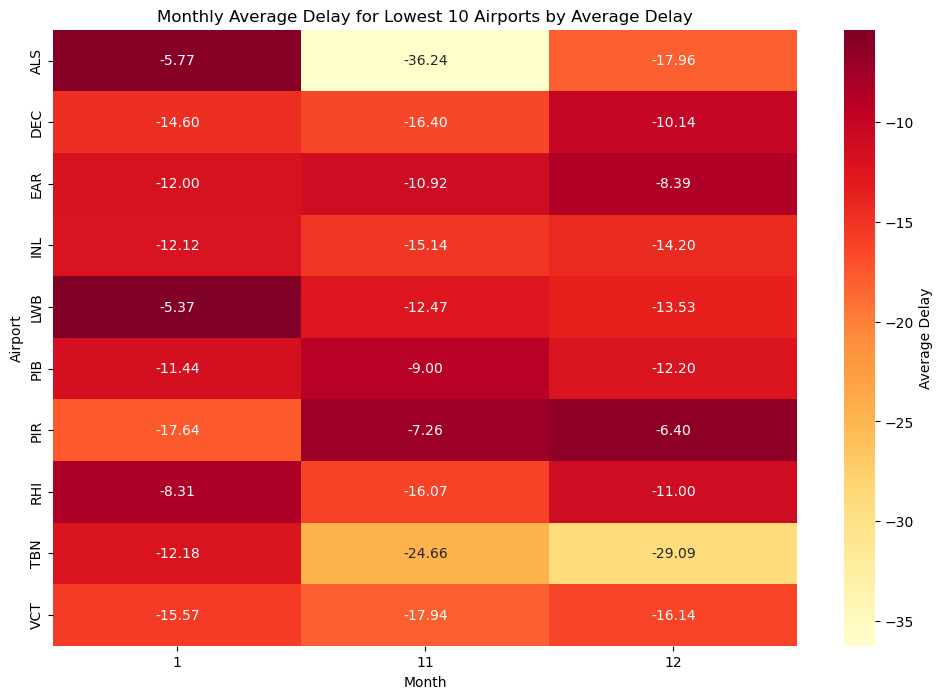

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设数据已经加载在 DataFrame `df` 中
# 1. 计算每个机场在每个月的取消率
airport_monthly_cancellation = df.groupby(['ORIGIN', 'MONTH'])['ARR_DELAY'].mean().reset_index()
airport_monthly_cancellation.columns = ['Airport', 'Month', 'Average Delay']

# 2. 计算每个机场的平均取消率，找到排名前十的机场
top_airports = airport_monthly_cancellation.groupby('Airport')[ 'Average Delay'].mean().nsmallest(10).index

# 3. 筛选出前十机场的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Airport'].isin(top_airports)]

# 4. 将数据转为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Airport", columns="Month", values= 'Average Delay')

# 5. 可视化 - 使用热力图展示取消率排名前十的机场在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label':  'Average Delay'})
plt.title("Monthly Average Delay for Lowest 10 Airports by Average Delay")
plt.xlabel("Month")
plt.ylabel("Airport")
plt.show()

# Monthly Average Delay for All Market Airlines by Average Delay

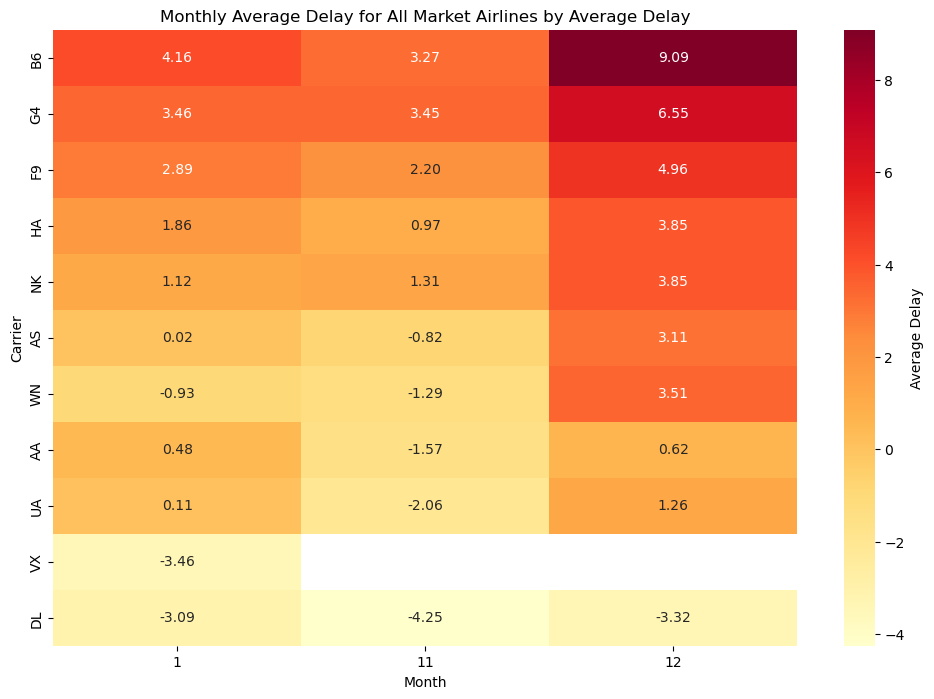

In [42]:
# 1. 计算每个航司在每个月的取消率
airport_monthly_cancellation = df.groupby(['MKT_CARRIER', 'MONTH'])['ARR_DELAY'].mean().reset_index()
airport_monthly_cancellation.columns = ['Carrier', 'Month', 'Average Delay']

# 2. 计算每个航司的平均取消率，按平均取消率排序
carrier_avg_cancellation = airport_monthly_cancellation.groupby('Carrier')['Average Delay'].mean().sort_values(ascending=False)

# 3. 获取取消率排名前十的航司
top_carriers = carrier_avg_cancellation.index

# 4. 筛选出前十航司的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Carrier'].isin(top_carriers)]

# 5. 将数据转换为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Carrier", columns="Month", values="Average Delay")

# 6. 重新按照平均取消率从高到低排序
pivot_table_top = pivot_table_top.loc[carrier_avg_cancellation.index]

# 7. 可视化 - 使用热力图展示所有航司在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Average Delay'})
plt.title("Monthly Average Delay for All Market Airlines by Average Delay")
plt.xlabel("Month")
plt.ylabel("Carrier")
plt.show()

# Monthly Average Delay for TOP 10 Operational Airlines by Average Delay

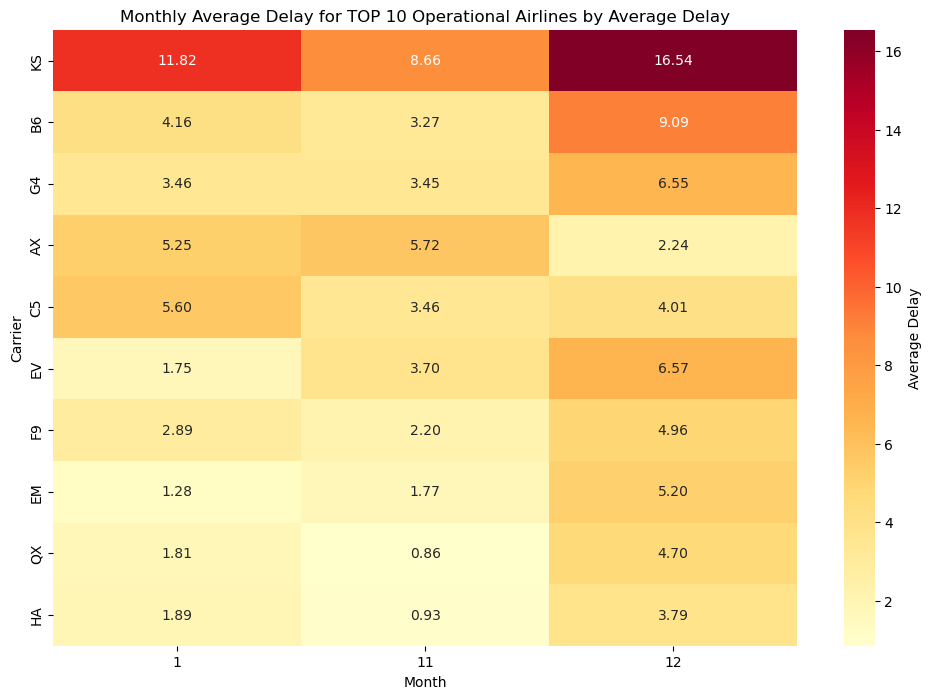

In [45]:
# 1. 计算每个航司在每个月的取消率
airport_monthly_cancellation = df.groupby(['OP_UNIQUE_CARRIER', 'MONTH'])['ARR_DELAY'].mean().reset_index()
airport_monthly_cancellation.columns = ['Carrier', 'Month', 'Average Delay']

# 2. 计算每个航司的平均取消率，按平均取消率排序
carrier_avg_cancellation = airport_monthly_cancellation.groupby('Carrier')['Average Delay'].mean().sort_values(ascending=False)

# 3. 获取取消率排名前十的航司
top_carriers = carrier_avg_cancellation.head(10).index

# 4. 筛选出前十航司的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Carrier'].isin(top_carriers)]

# 5. 将数据转换为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Carrier", columns="Month", values="Average Delay")

# 6. 重新按照平均取消率从高到低排序
pivot_table_top = pivot_table_top.loc[carrier_avg_cancellation.head(10).index]

# 7. 可视化 - 使用热力图展示所有航司在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Average Delay'})
plt.title("Monthly Average Delay for TOP 10 Operational Airlines by Average Delay")
plt.xlabel("Month")
plt.ylabel("Carrier")
plt.show()

# Monthly Average Delay for Lowest 10 Operational Airlines by Average Delay

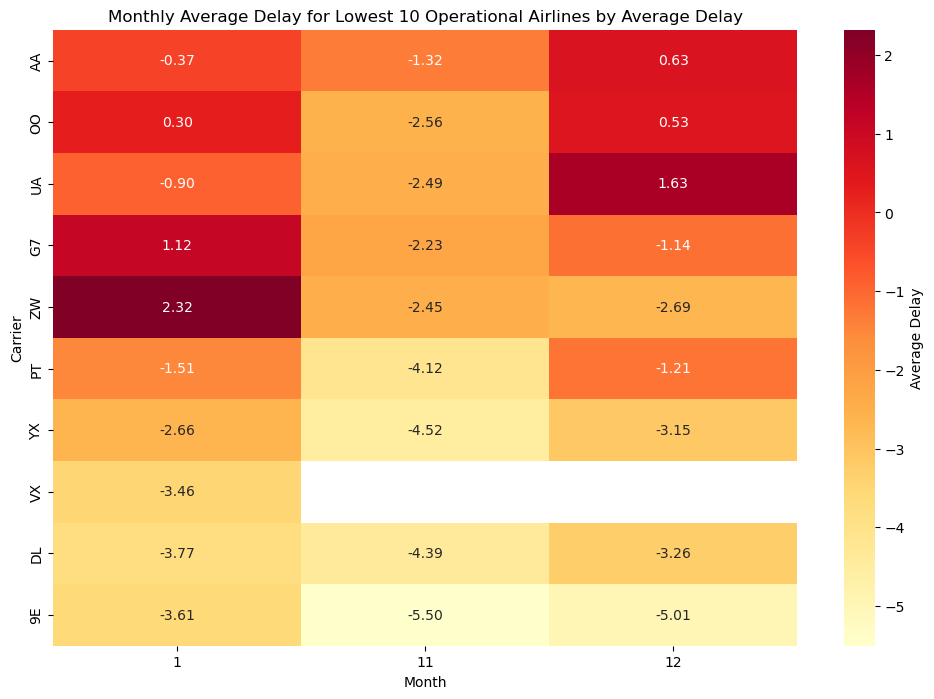

In [46]:
# 1. 计算每个航司在每个月的取消率
airport_monthly_cancellation = df.groupby(['OP_UNIQUE_CARRIER', 'MONTH'])['ARR_DELAY'].mean().reset_index()
airport_monthly_cancellation.columns = ['Carrier', 'Month', 'Average Delay']

# 2. 计算每个航司的平均取消率，按平均取消率排序
carrier_avg_cancellation = airport_monthly_cancellation.groupby('Carrier')['Average Delay'].mean().sort_values(ascending=False)

# 3. 获取取消率排名前十的航司
top_carriers = carrier_avg_cancellation.tail(10).index

# 4. 筛选出前十航司的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Carrier'].isin(top_carriers)]

# 5. 将数据转换为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Carrier", columns="Month", values="Average Delay")

# 6. 重新按照平均取消率从高到低排序
pivot_table_top = pivot_table_top.loc[carrier_avg_cancellation.tail(10).index]

# 7. 可视化 - 使用热力图展示所有航司在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Average Delay'})
plt.title("Monthly Average Delay for Lowest 10 Operational Airlines by Average Delay")
plt.xlabel("Month")
plt.ylabel("Carrier")
plt.show()

In [ ]:
# import pandas as pd
# import folium
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# # 假设数据已加载在 DataFrame `df` 中，包含 'ORIGIN', 'ORIGIN_CITY_NAME', 'CANCELLED' 列
# # 1. 计算每个机场的平均取消率
# airport_cancellation = df.groupby('ORIGIN')['CANCELLED'].mean().reset_index()
# airport_cancellation.columns = ['Airport', 'Cancellation Rate']

# # 2. 获取唯一的机场城市名称
# airport_locations = df[['ORIGIN', 'ORIGIN_CITY_NAME']].drop_duplicates().rename(columns={'ORIGIN': 'Airport'})

# # 3. 使用 geopy 获取每个城市的经纬度
# geolocator = Nominatim(user_agent="geoapiExercises")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # 防止请求过快

# # 创建新的列 'latitude' 和 'longitude' 存储经纬度
# airport_locations['location'] = airport_locations['ORIGIN_CITY_NAME'].apply(geocode)
# airport_locations['latitude'] = airport_locations['location'].apply(lambda loc: loc.latitude if loc else None)
# airport_locations['longitude'] = airport_locations['location'].apply(lambda loc: loc.longitude if loc else None)
# airport_locations = airport_locations.drop(columns=['location'])

# # 4. 合并机场经纬度信息和取消率
# airport_data = pd.merge(airport_cancellation, airport_locations, on='Airport')

# # 5. 过滤掉没有经纬度数据的机场
# airport_data = airport_data.dropna(subset=['latitude', 'longitude'])

# # 6. 创建地图对象
# m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # 中心点设置在美国

# # 7. 添加机场取消率的气泡
# for _, row in airport_data.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=row['Cancellation Rate'] * 50,  # 气泡大小与取消率成正比
#         color='red' if row['Cancellation Rate'] > 0.2 else 'orange' if row['Cancellation Rate'] > 0.1 else 'green',
#         fill=True,
#         fill_opacity=0.6,
#         tooltip=f"{row['Airport']}: {row['Cancellation Rate']:.2f}"
#     ).add_to(m)

# # 8. 显示地图
# m.save("airport_cancellation_map.html")


In [22]:
# pivot_table_carrier = carrier_monthly_cancellation.pivot(index="Carrier", columns="Month", values="Cancellation Rate")

# carrier_monthly_cancellation = df.groupby(['MKT_CARRIER', 'MONTH'])['CANCELLED'].mean().reset_index()
# carrier_monthly_cancellation.columns = ['Carrier', 'Month', 'Cancellation Rate']

# # 将数据转为透视表格式，方便绘制热力图
# pivot_table_carrier = carrier_monthly_cancellation.pivot(index="Carrier", columns="Month", values="Cancellation Rate")

# # 绘制热力图
# plt.figure(figsize=(12, 8))
# sns.heatmap(pivot_table_carrier, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Cancellation Rate'})
# plt.title("Monthly Cancellation Rates by Carrier")
# plt.xlabel("Month")
# plt.ylabel("Carrier")
# plt.show()


In [23]:
# # 查看数据的时间范围
# print(f"数据时间范围: {df['Timechange_FL_DATE'].min()} 至 {df['Timechange_FL_DATE'].max()}")

# # 统计不同时间单位的航班分布
# hourly_distribution = df['Timechange_CRS_DEP_Time'] // 100  # 提取小时信息
# hourly_counts = hourly_distribution.value_counts().sort_index()

# # 绘制每小时的航班分布
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# hourly_counts.plot(kind='bar')
# plt.title('Hourly Distribution of Flights')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Number of Flights')
# plt.show()


In [24]:
# # 筛选纽约市的三个机场
# nyc_airports = df[df['ORIGIN'].isin(['JFK', 'LGA', 'EWR'])]

# # 计算能见度和风速在不同机场之间的相关性
# weather_corr = nyc_airports.pivot_table(index='Timechange_FL_DATE', columns='ORIGIN', values='HourlyVisibility_ORIGIN').corr()

# # 可视化相关性矩阵
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.heatmap(weather_corr, annot=True, cmap='coolwarm', center=0)
# plt.title("Weather Visibility Correlation Across NYC Airports (JFK, LGA, EWR)")
# plt.show()


In [25]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 按月计算取消率，检测异常波动
# monthly_cancellation = df.groupby(['YEAR', 'MONTH'])['CANCELLED'].mean().reset_index()
# monthly_cancellation['Date'] = pd.to_datetime(monthly_cancellation[['YEAR', 'MONTH']].assign(DAY=1))

# # 可视化月度取消率
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=monthly_cancellation, x='Date', y='CANCELLED')
# plt.title("Monthly Cancellation Rate Over Time")
# plt.xlabel("Date")
# plt.ylabel("Cancellation Rate")
# plt.show()


In [26]:
# # 筛选出纽瓦克、JFK 和拉瓜迪亚的航班数据
# ny_airports = df[df['ORIGIN'].isin(['EWR', 'JFK', 'LGA'])]

# # 计算这些机场的月度取消率
# ny_monthly_cancellation = ny_airports.groupby(['YEAR', 'MONTH', 'ORIGIN'])['CANCELLED'].mean().reset_index()

# # 绘制每个机场的月度取消率趋势
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=ny_monthly_cancellation, x='MONTH', y='CANCELLED', hue='ORIGIN')
# plt.title("Monthly Cancellation Rate for NYC Area Airports (EWR, JFK, LGA)")
# plt.xlabel("Month")
# plt.ylabel("Cancellation Rate")
# plt.show()


In [27]:
# # 创建 COVID-19 阶段标签
# def covid_phase(year):
#     if year < 2020:
#         return 'Pre COVID-19'
#     elif year in [2020, 2021]:
#         return 'During COVID-19'
#     else:
#         return 'Post COVID-19'

# df['COVID_Phase'] = df['YEAR'].apply(covid_phase)

# # 计算每个 COVID 阶段的取消率
# covid_cancellation = df.groupby('COVID_Phase')['CANCELLED'].mean().reset_index()

# # 绘制 COVID 阶段取消率
# plt.figure(figsize=(8, 6))
# sns.barplot(data=covid_cancellation, x='COVID_Phase', y='CANCELLED')
# plt.title("Cancellation Rate by COVID-19 Phase")
# plt.xlabel("COVID-19 Phase")
# plt.ylabel("Cancellation Rate")
# plt.show()


In [31]:
# 筛选2022年12月的西南航空数据
southwest_2022_meltdown = df[(df['YEAR'] == 2022) & (df['MONTH'] == 12) & (df['MKT_CARRIER'] == 'WN')]

# 计算取消率
southwest_cancel_rate = southwest_2022_meltdown['CANCELLED'].mean()
print(f"2022年12月西南航空的取消率: {southwest_cancel_rate:.2%}")


2022年12月西南航空的取消率: 14.94%


In [32]:
# 筛选出2022年春季（例如3月至5月）在西雅图的阿拉斯加航空数据
alaska_sea_2022 = df[(df['YEAR'] == 2022) & (df['MONTH'].isin([3, 4, 5])) & (df['ORIGIN'] == 'SEA') & (df['MKT_CARRIER'] == 'AS')]

# 计算取消率
alaska_sea_cancel_rate = alaska_sea_2022['CANCELLED'].mean()
print(f"2022年春季西雅图阿拉斯加航空的取消率: {alaska_sea_cancel_rate:.2%}")


2022年春季西雅图阿拉斯加航空的取消率: nan%


In [ ]:
# 筛选12月和1月的假日季数据
holiday_season = df[df['MONTH'].isin([12, 1])]

# 计算取消率，并根据天气变量进一步分析
plt.figure(figsize=(10, 6))
sns.boxplot(x='HourlyVisibility_ORIGIN', y='CANCELLED', data=holiday_season)
plt.title("Holiday Season: Visibility vs. Cancellation Rate")
plt.xlabel("Visibility at Origin Airport")
plt.ylabel("Cancellation Rate")
plt.show()


In [37]:
# 假设机型信息在 'AircraftType' 列中，并包含737 MAX
max_grounding = df[(df['AircraftType'] == '737 MAX') & 
                   ((df['YEAR'] == 2019) & (df['MONTH'] >= 3) | 
                    (df['YEAR'] == 2020) & (df['MONTH'] <= 12) | 
                    (df['YEAR'] == 2024))]

# 计算737 MAX 停飞期间的取消率
max_cancel_rate = max_grounding['CANCELLED'].mean()
print(f"737 MAX 停飞期间的取消率: {max_cancel_rate:.2%}")


KeyError: 'AircraftType'

C:\Users\lou3208\AppData\Local\Temp\ipykernel_13636\445880427.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alaska_virgin['Merger_Phase'] = alaska_virgin['YEAR'].apply(alaska_virgin_merger_phase)


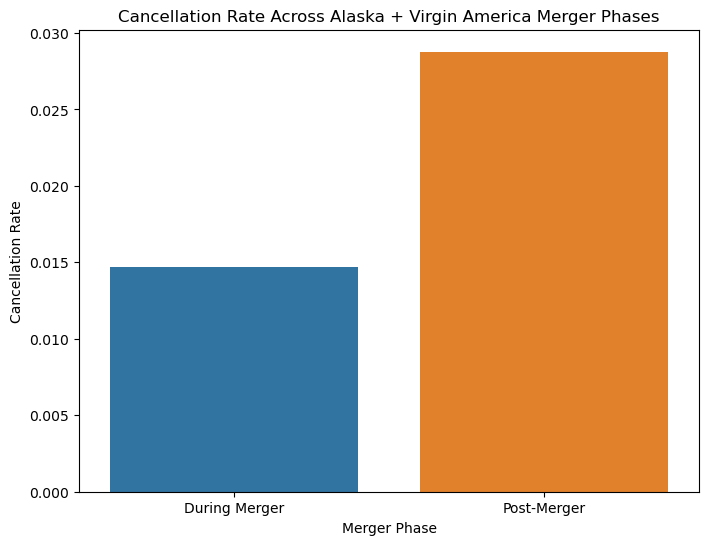

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 筛选阿拉斯加航空和维珍美国的数据
alaska_virgin = df[df['MKT_CARRIER'].isin(['AS', 'VX'])]

# 创建时间段标签，标记合并前（2016年之前）、合并期（2016-2018）和合并后（2019年及以后）
def alaska_virgin_merger_phase(year):
    if year < 2016:
        return 'Pre-Merger'
    elif 2016 <= year <= 2018:
        return 'During Merger'
    else:
        return 'Post-Merger'

alaska_virgin['Merger_Phase'] = alaska_virgin['YEAR'].apply(alaska_virgin_merger_phase)

# 计算每个阶段的取消率
alaska_virgin_cancellation = alaska_virgin.groupby('Merger_Phase')['CANCELLED'].mean().reset_index()

# 可视化取消率的变化
plt.figure(figsize=(8, 6))
sns.barplot(data=alaska_virgin_cancellation, x='Merger_Phase', y='CANCELLED')
plt.title("Cancellation Rate Across Alaska + Virgin America Merger Phases")
plt.xlabel("Merger Phase")
plt.ylabel("Cancellation Rate")
plt.show()


C:\Users\lou3208\AppData\Local\Temp\ipykernel_13636\1122147338.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_american['Merger_Phase'] = us_american['YEAR'].apply(us_american_merger_phase)


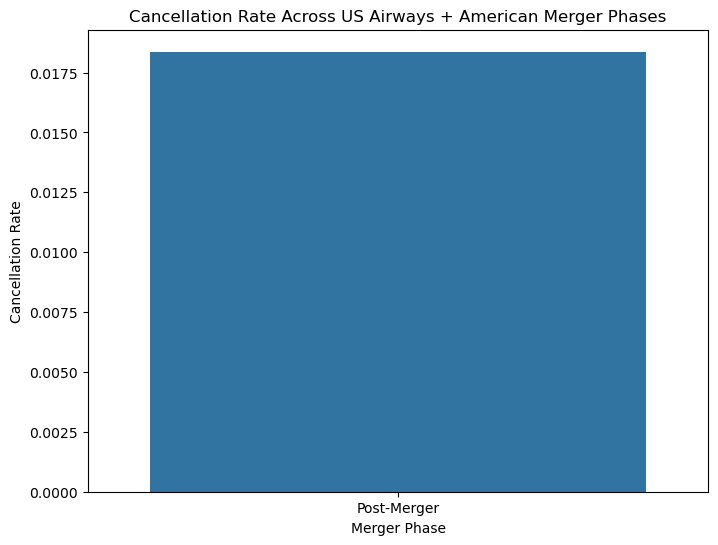

In [39]:
# 筛选美国航空和全美航空的数据
us_american = df[df['MKT_CARRIER'].isin(['US', 'AA'])]

# 创建时间段标签，标记合并前（2013年之前）、合并期（2013-2015）和合并后（2016年及以后）
def us_american_merger_phase(year):
    if year < 2013:
        return 'Pre-Merger'
    elif 2013 <= year <= 2015:
        return 'During Merger'
    else:
        return 'Post-Merger'

us_american['Merger_Phase'] = us_american['YEAR'].apply(us_american_merger_phase)

# 计算每个阶段的取消率
us_american_cancellation = us_american.groupby('Merger_Phase')['CANCELLED'].mean().reset_index()

# 可视化取消率的变化
plt.figure(figsize=(8, 6))
sns.barplot(data=us_american_cancellation, x='Merger_Phase', y='CANCELLED')
plt.title("Cancellation Rate Across US Airways + American Merger Phases")
plt.xlabel("Merger Phase")
plt.ylabel("Cancellation Rate")
plt.show()


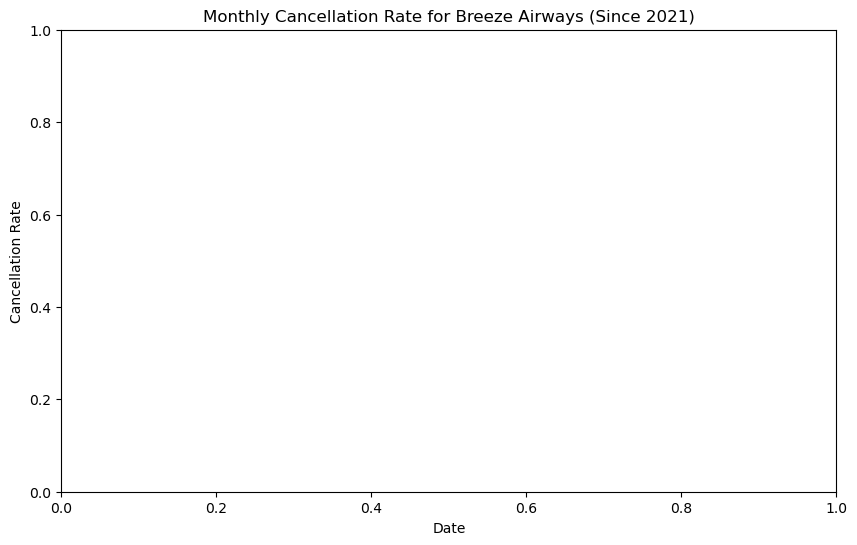

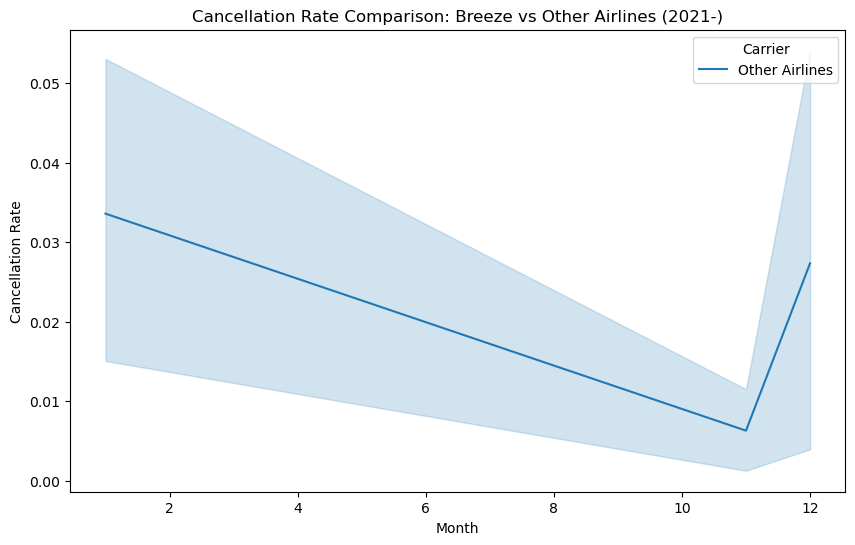

In [40]:
# 筛选 Breeze 的数据
breeze_data = df[(df['MKT_CARRIER'] == 'MX') & (df['YEAR'] >= 2021)]  # 假设 Breeze 的航空公司代码为 'MX'

# 计算月度取消率
breeze_monthly_cancellation = breeze_data.groupby(['YEAR', 'MONTH'])['CANCELLED'].mean().reset_index()
breeze_monthly_cancellation['Date'] = pd.to_datetime(breeze_monthly_cancellation[['YEAR', 'MONTH']].assign(DAY=1))

# 可视化 Breeze 月度取消率
plt.figure(figsize=(10, 6))
sns.lineplot(data=breeze_monthly_cancellation, x='Date', y='CANCELLED')
plt.title("Monthly Cancellation Rate for Breeze Airways (Since 2021)")
plt.xlabel("Date")
plt.ylabel("Cancellation Rate")
plt.show()

# 比较 Breeze 与其他航空公司在同一时期的平均取消率
other_airlines = df[(df['MKT_CARRIER'] != 'MX') & (df['YEAR'] >= 2021)]
comparison = pd.concat([
    breeze_data.groupby(['YEAR', 'MONTH'])['CANCELLED'].mean().reset_index().assign(Carrier='Breeze'),
    other_airlines.groupby(['YEAR', 'MONTH'])['CANCELLED'].mean().reset_index().assign(Carrier='Other Airlines')
])

plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison, x='MONTH', y='CANCELLED', hue='Carrier')
plt.title("Cancellation Rate Comparison: Breeze vs Other Airlines (2021-)")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.legend(title="Carrier")
plt.show()


In [44]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'YEAR', 'MONTH', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'MKT_CARRIER', 'MKT_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Timechange_CRS_DEP_Time',
       'Timechange_FL_DATE', 'DATE_ORIGIN', 'NAME_ORIGIN',
       'REPORT_TYPE_ORIGIN', 'HourlyPrecipitation_ORIGIN',
       'HourlyRelativeHumidity_ORIGIN', 'HourlySkyConditions_ORIGIN',
       'HourlyStationPressure_ORIGIN', 'HourlyVisibility_ORIGIN',
       'HourlyWetBulbTemperature_ORIGIN', 'HourlyWindGustSpeed_ORIGIN',
       'HourlyWindSpeed_ORIGIN', 'DailySnowDepth_ORIGIN',
       'DailySnowfall

In [45]:
df = pd.read_csv("D:/flight_weather_data_V9_5_5.csv", index_col=0)

MemoryError: Unable to allocate 2.79 GiB for an array with shape (36, 10407118) and data type float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设数据已经加载在 DataFrame `df` 中
# 1. 筛选 2023 年的联合航空假日季航班（感恩节、圣诞节、新年期间）
holiday_dates = {
    "Thanksgiving": pd.date_range("2023-11-20", "2023-11-24"),
    "Christmas": pd.date_range("2023-12-22", "2023-12-26"),
    "New Year": pd.date_range("2023-12-29", "2024-01-02")
}

# 筛选 ORD 到 LGA 的 United 航班，限定假日季日期和工作日（周一至周五）
filtered_df = df[
    (df['MKT_CARRIER'] == 'UA') & 
    (df['ORIGIN'] == 'ORD') & 
    (df['DEST'] == 'LGA') & 
    (df['YEAR'] == 2023) & 
    (df['DAY_OF_WEEK'].isin([1, 2, 3, 4, 5])) &  # 周一至周五
    (df['FL_DATE'].isin(pd.concat(holiday_dates.values())))
]

# 添加假日标签
filtered_df['Holiday'] = filtered_df['FL_DATE'].apply(
    lambda x: next((holiday for holiday, dates in holiday_dates.items() if x in dates), 'Non-Holiday')
)

# 2. 提取出发时间小时
filtered_df['Dep_Hour'] = filtered_df['CRS_DEP_TIME'] // 100  # 提取小时信息

# 3. 计算每小时的取消率，按假日分组
hourly_cancellation = filtered_df.groupby(['Dep_Hour', 'Holiday'])['CANCELLED'].mean().reset_index()

# 4. 可视化取消率的变化趋势
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hourly_cancellation, x='Dep_Hour', y='CANCELLED', hue='Holiday', style='Holiday')
plt.title("Proportion of Cancelled United Flights from ORD to LGA (2023 Holiday Season)")
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Proportion of Cancelled Flights")
plt.legend(title="Holiday")
plt.show()

In [ ]:
data = df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X = data.drop(columns=['CANCELLED', 'DIVERTED', 'DEP_TIME','DEP_DELAY', 'TAXI_OUT', 
                           'TAXI_IN', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 
                           'DISTANCE', 'CARRIER_DELAY', 
                           'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
                           'LATE_AIRCRAFT_DELAY', 
                           'Timechange_ARR_Time', 'DELAYED', 'Y', 
                           'Timechange_FL_DATE', 'DATE_ORIGIN', 
                           'DATE_DEST'])
y = data['CANCELLED']
# 将因变量加入数据集，便于计算自变量与因变量的相关性
data_with_target = X.copy()
data_with_target['target'] = y  # 假设 y 是因变量

# 计算相关性矩阵
corr_matrix = data_with_target.corr()

# 绘制热力图，展示自变量和因变量之间的相关性
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 1: Identify variables
quantitative_vars = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()
time_vars = [col for col in data.columns if 'DATE' in col or 'TIME' in col]
non_time_categorical_vars = [col for col in categorical_vars if col not in time_vars]

# Step 2: Plot pie charts for non-date-time categorical variables
for col in non_time_categorical_vars:
    plt.figure(figsize=(6, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Hide the y-axis label for a cleaner look
    plt.show()

# Step 3: Standardize quantitative variables and plot boxplots
quantitative_data = data[quantitative_vars]
scaler = StandardScaler()
quantitative_data_scaled = pd.DataFrame(scaler.fit_transform(quantitative_data), columns=quantitative_vars)

plt.figure(figsize=(15, 10))
quantitative_data_scaled.boxplot(rot=90)
plt.title('Boxplots of Standardized Quantitative Variables')
plt.ylabel('Standardized Value')
plt.xticks(rotation=90)
plt.show()

# Step 4: Suggested visualizations for date-time variables
# Convert time variables to datetime format
for col in time_vars:
    try:
        data[col] = pd.to_datetime(data[col])
    except Exception as e:
        print(f"Could not convert {col} to datetime: {e}")

# Plotting a time series of flight counts over time if 'FL_DATE' exists
if 'FL_DATE' in data.columns:
    plt.figure(figsize=(10, 6))
    data['FL_DATE'].value_counts().sort_index().plot()
    plt.title('Flight Counts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Flights')
    plt.show()

# Distribution of flights by hour if 'DEP_TIME' is available
if 'DEP_TIME' in data.columns:
    data['DEP_HOUR'] = pd.to_datetime(data['DEP_TIME'], format='%H%M', errors='coerce').dt.hour
    plt.figure(figsize=(10, 6))
    sns.histplot(data['DEP_HOUR'], bins=24, kde=True)
    plt.title('Distribution of Departure Times by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# 模型

In [ ]:
# 1. 预测是否cancel
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Step 1: Separate the target variable and features, drop datetime columns
    X = data.drop(columns=['CANCELLED', 'DIVERTED', 'DEP_TIME','DEP_DELAY', 'TAXI_OUT', 
                           'TAXI_IN', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 
                           'DISTANCE', 'CARRIER_DELAY', 'CRS_ARR_TIME',
                           'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
                           'LATE_AIRCRAFT_DELAY', 
                           'Timechange_ARR_Time', 'DELAYED', 'Y', 
                           'Timechange_FL_DATE', 'DATE_ORIGIN', 
                           'DATE_DEST'])
    y = data['CANCELLED']

    # Step 2: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=1, stratify=y)

    # Step 3: Data Preprocessing with ColumnTransformer
    numeric_features = X_train.select_dtypes(exclude='object').columns
    categorical_features = X_train.select_dtypes(include='object').columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())  # Feature scaling for numeric data
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Step 4: Pipeline for logistic regression including preprocessing, feature selection, and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif, k=10)),  # Feature selection
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
    ])

    # Step 5: Hyperparameter Tuning using GridSearchCV
    param_grid = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__penalty': ['l2'],                    # L2 regularization
        'classifier__solver': ['lbfgs', 'liblinear'],     # Solvers
        'classifier__class_weight': [None, 'balanced']
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1)  # n_jobs=1 to avoid parallel processing issues
    grid_search.fit(X_train, y_train)

    # Output the best parameters and the best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", grid_search.best_score_)

    # Step 6: Model Evaluation on Test Set
    best_model = grid_search.best_estimator_

    y_test_pred = best_model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Test Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Step 7: Feature Importance Plot
    # Extract selected feature names
    # Get transformed feature names
    categorical_feature_names = grid_search.best_estimator_['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = np.concatenate([numeric_features, categorical_feature_names])

    # Select top features based on SelectKBest
    selected_feature_indices = grid_search.best_estimator_['feature_selection'].get_support(indices=True)
    selected_feature_names = all_feature_names[selected_feature_indices]

    # Get feature importances based on model coefficients
    feature_importances = np.abs(best_model['classifier'].coef_[0])

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(selected_feature_names, feature_importances, color='skyblue')
    plt.xlabel('Coefficient Magnitude (Feature Importance)')
    plt.ylabel('Feature')
    plt.title('Feature Importance in Logistic Regression Model')
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
 # Step 8: Inspect the Coefficient of Scheduled Departure Time
if 'Timechange_CRS_DEP_Time' in selected_feature_names:
    index = selected_feature_names.tolist().index('Timechange_CRS_DEP_Time')
    coef = best_model['classifier'].coef_[0][index]
    print(f"Coefficient for 'Timechange_CRS_DEP_Time' (Scheduled Departure Time): {coef}")
else:
    print("'Timechange_CRS_DEP_Time' (Scheduled Departure Time) was not selected as a feature.")

In [ ]:
# 预测是否delay
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Step 1: Filter rows where CANCELLED = 0 and set target as DELAYED
    filtered_data = data[data['CANCELLED'] == 0]
    X = filtered_data.drop(columns=['CANCELLED', 'DELAYED', 'DIVERTED', 'DEP_DELAY', 
                                    'ARR_DELAY', 'ACTUAL_ELAPSED_TIME',
                                    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 
                                    'SECURITY_DELAY', 
                                    'LATE_AIRCRAFT_DELAY', 'Y', 
                                    'Timechange_FL_DATE', 
                                    'DATE_ORIGIN', 'DATE_DEST'])
    y = filtered_data['DELAYED']

    # Step 2: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=1, stratify=y)

    # Step 3: Data Preprocessing with ColumnTransformer
    numeric_features = X_train.select_dtypes(exclude='object').columns
    categorical_features = X_train.select_dtypes(include='object').columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())  # Feature scaling for numeric data
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Step 4: Pipeline for logistic regression including preprocessing, feature selection, and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif, k=10)),  # Feature selection
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
    ])

    # Step 5: Hyperparameter Tuning using GridSearchCV
    param_grid = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__penalty': ['l2'],                    # L2 regularization
        'classifier__solver': ['lbfgs', 'liblinear'],     # Solvers
        'classifier__class_weight': [None, 'balanced']
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1)  # n_jobs=1 to avoid parallel processing issues
    grid_search.fit(X_train, y_train)

    # Output the best parameters and the best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", grid_search.best_score_)

    # Step 6: Model Evaluation on Test Set
    best_model = grid_search.best_estimator_

    y_test_pred = best_model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Test Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Step 7: Feature Importance Plot
    # Extract selected feature names
    # Get transformed feature names
    categorical_feature_names = grid_search.best_estimator_['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = np.concatenate([numeric_features, categorical_feature_names])

    # Select top features based on SelectKBest
    selected_feature_indices = grid_search.best_estimator_['feature_selection'].get_support(indices=True)
    selected_feature_names = all_feature_names[selected_feature_indices]

    # Get feature importances based on model coefficients
    feature_importances = np.abs(best_model['classifier'].coef_[0])

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(selected_feature_names, feature_importances, color='skyblue')
    plt.xlabel('Coefficient Magnitude (Feature Importance)')
    plt.ylabel('Feature')
    plt.title('Feature Importance in Logistic Regression Model')
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
# 预测Y
# Import necessary libraries for regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Filter data where CANCELLED = 0 and DELAYED = 1
filtered_data = data[(data['CANCELLED'] == 0) & (data['DELAYED'] == 1)]

# Step 2: Separate features and target variable
X = filtered_data.drop(columns=['Y', 'CANCELLED', 'DELAYED', 'DIVERTED', 'ARR_DELAY',  
                                'CARRIER_DELAY', 'WEATHER_DELAY',
                                'NAS_DELAY', 'SECURITY_DELAY', 
                                'LATE_AIRCRAFT_DELAY',
                                'Timechange_FL_DATE', 
                                'DATE_ORIGIN', 'DATE_DEST'])
y = filtered_data['Y']

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Step 4: Data Preprocessing with ColumnTransformer
numeric_features = X_train.select_dtypes(exclude='object').columns
categorical_features = X_train.select_dtypes(include='object').columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 5: Pipeline for Random Forest including preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 6: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

# Step 7: Model Evaluation on Test Set
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
print("Test Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Test Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("Test R-squared Score:", r2_score(y_test, y_test_pred))

# Step 8: Feature Importance Plot
# Retrieve the feature names after one-hot encoding
categorical_feature_names = grid_search.best_estimator_['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, categorical_feature_names])

# Get feature importances from the Random Forest model
feature_importances = best_model['regressor'].feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(all_feature_names[sorted_indices][:10], feature_importances[sorted_indices][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# 预测Y--2
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter data where CANCELLED = 0 and DELAYED = 1
filtered_data = data[(data['CANCELLED'] == 0) & (data['DELAYED'] == 1)]

# Step 2: Separate features and target variable
X = filtered_data.drop(columns=['Y', 'CANCELLED', 'DELAYED', 'DIVERTED', 'ARR_DELAY',  
                                'CARRIER_DELAY', 'WEATHER_DELAY',
                                'NAS_DELAY', 'SECURITY_DELAY', 
                                'LATE_AIRCRAFT_DELAY',
                                'Timechange_FL_DATE', 
                                'DATE_ORIGIN', 'DATE_DEST'])
y = filtered_data['Y']

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)